<a href="https://colab.research.google.com/github/mlacasa/EstadisticaQ2/blob/main/Actividad_2_Regresi%C3%B3n_Clasificacion_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad práctica: Interpretación de modelos de **regresión** y **clasificación**

En esta actividad (introducción a modelización en investigación clínica) trabajaremos con dos tipos de modelos muy habituales:

- **Regresión**: cuando la variable resultado es **continua** (p. ej., biomarcadores, escalas clínicas, tiempo de estancia).
- **Clasificación**: cuando la variable resultado es **binaria o categórica** (p. ej., evento sí/no, respuesta al tratamiento, reingreso).

El objetivo es aprender a **interpretar correctamente** la salida de los modelos (signo y magnitud de coeficientes, significado clínico, e indicadores básicos de rendimiento) y a comunicar conclusiones de forma clara, evitando errores frecuentes como confundir asociación con causalidad o sobreinterpretar métricas.

# Dataset: Breast Cancer Wisconsin (Diagnostic)

En esta práctica utilizaremos la conocida base **Breast Cancer Wisconsin (Diagnostic)**, muy habitual en aprendizaje automático. Contiene observaciones de tumores de mama etiquetadas como:

- **Maligno (enfermo)**  
- **Benigno (no enfermo)**

Para cada caso se dispone de un conjunto de **variables numéricas** calculadas a partir de características morfológicas del tumor (medidas relacionadas con tamaño, forma y textura). En general, trabajaremos con una matriz de predictores **X** (variables clínicas/derivadas) y una variable objetivo **y** (diagnóstico).

## Importante: clasificación y regresión tienen el mismo peso

En esta actividad, la **clasificación** y la **regresión** se consideran **igual de importantes**. La evaluación valorará de forma equilibrada:

- La capacidad de construir e interpretar modelos de **clasificación** (maligno vs benigno), y
- La capacidad de construir e interpretar modelos de **regresión** para predecir valores de variables relevantes del dataset.

Por tanto, se espera que desarrolles y justifiques decisiones metodológicas (variables, métricas, interpretación) **en ambas tareas**, y que demuestres competencias adquiridas tanto en regresión como en clasificación.



In [1]:
# Librerías básicas
import numpy as np
import pandas as pd

# Modelos: ALD (LDA), RL (Regresión Logística), RF (Random Forest)
from sklearn.datasets import load_breast_cancer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Importar dataset
data = load_breast_cancer()

# Pasarlo a DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")  # 0=malignant, 1=benign en este dataset
df = pd.concat([X, y], axis=1)

# Mostrar primeras 5 filas
df.head(5)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



## Comentario de **todas** las variables (30 predictores)

El conjunto **X** contiene 30 variables numéricas, organizadas en **tres bloques** (media, error estándar y “peor” valor) para 10 características morfológicas del tumor.

> Nota: son medidas derivadas de análisis de imagen; su escala depende del procedimiento de medida (no deben interpretarse como “cm” o “mm” sin esa información adicional).

### 1) Variables tipo **mean** (valor medio)
- **mean radius**: radio medio (tamaño global).
- **mean texture**: textura media (variación de intensidades).
- **mean perimeter**: perímetro medio (tamaño/contorno).
- **mean area**: área media (tamaño).
- **mean smoothness**: suavidad media del contorno (variación local del radio).
- **mean compactness**: compacidad media (relación entre perímetro y área; “redondez”).
- **mean concavity**: concavidad media (profundidad de entrantes del contorno).
- **mean concave points**: número/proporción media de puntos cóncavos (irregularidad del borde).
- **mean symmetry**: simetría media de la forma.
- **mean fractal dimension**: dimensión fractal media (complejidad/irregularidad del contorno).

### 2) Variables tipo **se** (error estándar)
- **radius error**: variabilidad/incertidumbre (SE) del radio.
- **texture error**: variabilidad/incertidumbre (SE) de la textura.
- **perimeter error**: variabilidad/incertidumbre (SE) del perímetro.
- **area error**: variabilidad/incertidumbre (SE) del área.
- **smoothness error**: variabilidad/incertidumbre (SE) de la suavidad.
- **compactness error**: variabilidad/incertidumbre (SE) de la compacidad.
- **concavity error**: variabilidad/incertidumbre (SE) de la concavidad.
- **concave points error**: variabilidad/incertidumbre (SE) de los puntos cóncavos.
- **symmetry error**: variabilidad/incertidumbre (SE) de la simetría.
- **fractal dimension error**: variabilidad/incertidumbre (SE) de la dimensión fractal.

### 3) Variables tipo **worst** (valor “peor”, típicamente el mayor)
- **worst radius**: mayor radio observado (tamaño máximo).
- **worst texture**: mayor textura observada (máxima heterogeneidad).
- **worst perimeter**: mayor perímetro observado.
- **worst area**: mayor área observada.
- **worst smoothness**: mayor valor de “rugosidad/suavidad” según definición (extremo).
- **worst compactness**: mayor compacidad observada.
- **worst concavity**: mayor concavidad observada.
- **worst concave points**: mayor número/proporción de puntos cóncavos observada.
- **worst symmetry**: mayor asimetría/simetría extrema observada (según escala).
- **worst fractal dimension**: mayor complejidad del contorno (dimensión fractal extrema).

### Variable objetivo (no es predictor)
- **target**: etiqueta diagnóstica binaria  
  **0 = maligno (enfermo)**, **1 = benigno (no enfermo)**.



## Cómo clasifican ALD (LDA), RL y RF, y qué necesitan para entrenar/validar

### 1) ALD / LDA (Análisis Discriminante Lineal)
- **Qué hace:** busca una combinación lineal de las variables que **separe mejor** las dos clases. Asume, de forma aproximada, que cada clase sigue una distribución “tipo gaussiana” y que comparten una **misma matriz de covarianzas**, lo que conduce a una **frontera de decisión lineal**.
- **Qué necesita para entrenar:**  
  - `X_train`: matriz de variables (filas = pacientes, columnas = variables).  
  - `y_train`: etiqueta de clase (maligno/benigno).
- **Qué necesita el test para validar:**  
  - `X_test` para generar predicciones.  
  - `y_test` solo para **evaluar** (matriz de confusión, sensibilidad, especificidad, AUC, etc.).

### 2) RL (Regresión Logística)
- **Qué hace:** aprende una relación lineal entre variables y el **log-odds** del evento; devuelve una **probabilidad** (vía función sigmoide) y clasifica aplicando un **umbral** (p. ej. 0.5). La frontera también es **lineal** (salvo transformaciones/variables no lineales añadidas).
- **Qué necesita para entrenar:** `X_train` y `y_train`.
- **Qué necesita el test para validar:** `X_test` para predecir y `y_test` para calcular métricas.

### 3) RF (Random Forest)
- **Qué hace:** combina muchos **árboles de decisión** entrenados con *bootstrap* (muestras con reemplazo) y selección aleatoria de variables en cada división. Produce una clasificación por **votación** (o promedio de probabilidades). Capta **relaciones no lineales** e interacciones de forma natural.
- **Qué necesita para entrenar:** `X_train` y `y_train`.
- **Qué necesita el test para validar:** `X_test` para predecir y `y_test` para evaluar.

---

## Qué hay que normalizar (y cuándo)

- **ALD/LDA y RL:** conviene **normalizar/estandarizar** las variables (p. ej., media 0 y desviación típica 1), porque:
  - trabajan con combinaciones lineales y (en LDA) con covarianzas, por lo que las escalas pueden dominar el resultado.
- **RF:** en general **no necesita normalización**, porque los árboles toman decisiones por umbrales y no dependen de la escala de la variable de la misma manera.

### Regla clave para evitar “fugas de información” (data leakage)
- Cualquier normalización debe **ajustarse solo con el conjunto de entrenamiento** (calcular medias y desviaciones en `X_train`) y **aplicarse después** a `X_train` y `X_test` con esos mismos parámetros.


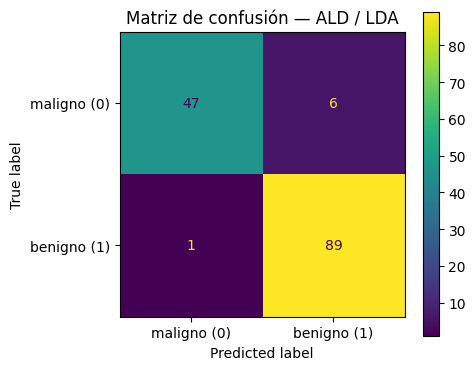

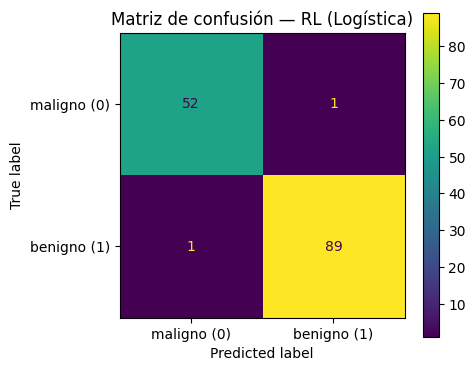

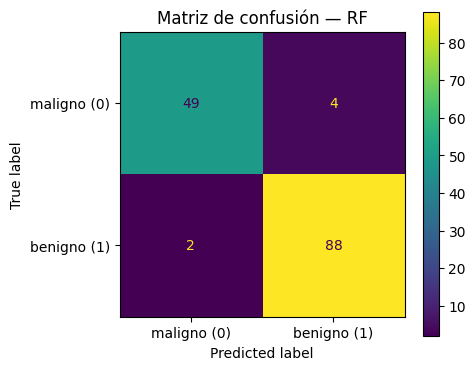

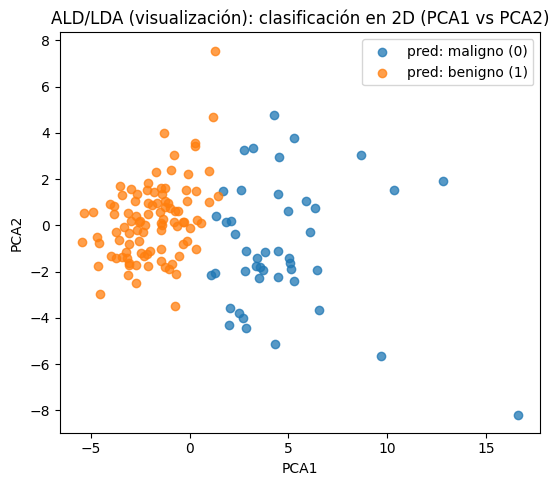

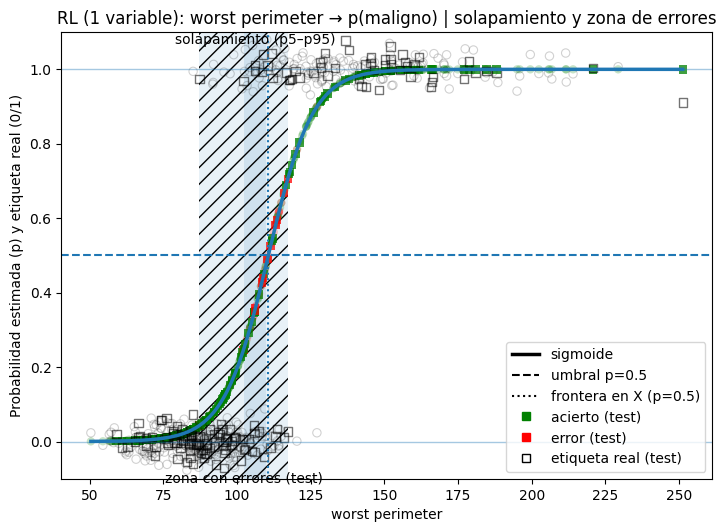

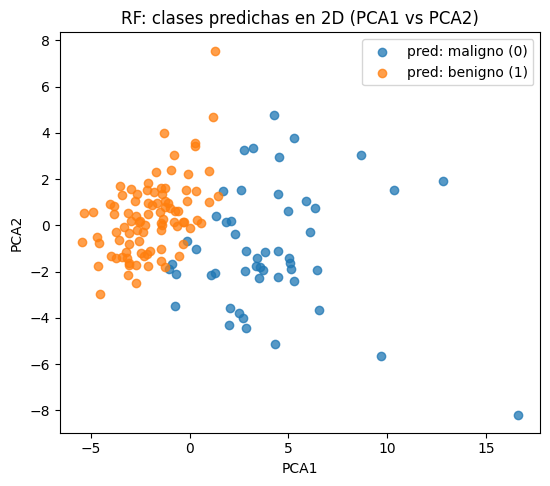

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# --- Asegurar dataset (por si no existe de celdas anteriores) ---
try:
    X  # noqa: F821
    y  # noqa: F821
except NameError:
    data = load_breast_cancer()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = pd.Series(data.target, name="target")  # 0=malignant, 1=benign

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# --- Modelos ---
lda_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lda", LinearDiscriminantAnalysis())
])

rl_model = Pipeline([
    ("scaler", StandardScaler()),
    ("rl", LogisticRegression(max_iter=5000, solver="lbfgs"))
])

rf_model = RandomForestClassifier(
    n_estimators=500, random_state=42, class_weight="balanced"
)

# Entrenar
lda_model.fit(X_train, y_train)
rl_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predecir
pred_lda = lda_model.predict(X_test)
pred_rl  = rl_model.predict(X_test)
pred_rf  = rf_model.predict(X_test)

# Probabilidades (para AUC maligno)
proba_lda = lda_model.predict_proba(X_test)
proba_rl  = rl_model.predict_proba(X_test)
proba_rf  = rf_model.predict_proba(X_test)

# Índice de clase "malignant" (=0) en predict_proba
def class0_index(model):
    if hasattr(model, "classes_"):
        classes = model.classes_
    else:
        classes = model.classes_
    return int(np.where(classes == 0)[0][0])

idx0_lda = class0_index(lda_model)
idx0_rl  = class0_index(rl_model)
idx0_rf  = class0_index(rf_model)

y_test_malign = (y_test == 0).astype(int)

# --- Matrices de confusión ---
labels = [0, 1]
disp_labels = ["maligno (0)", "benigno (1)"]

cm_lda = confusion_matrix(y_test, pred_lda, labels=labels)
cm_rl  = confusion_matrix(y_test, pred_rl,  labels=labels)
cm_rf  = confusion_matrix(y_test, pred_rf,  labels=labels)

for name, cm in [("ALD / LDA", cm_lda), ("RL (Logística)", cm_rl), ("RF", cm_rf)]:
    fig, ax = plt.subplots(figsize=(4.6, 4.2))
    ConfusionMatrixDisplay(cm, display_labels=disp_labels).plot(ax=ax, values_format="d")
    ax.set_title(f"Matriz de confusión — {name}")
    plt.show()

# --- Comparación de resultados ---
def specificity_from_cm(cm):
    # cm con etiquetas [0,1] (0=maligno, 1=benigno)
    tn = cm[1, 1]  # verdadero benigno predicho benigno (TN si "maligno" es positivo)
    fp = cm[1, 0]  # benigno predicho maligno (FP)
    return tn / (tn + fp) if (tn + fp) > 0 else np.nan

def metrics_row(name, y_true, y_pred, proba_class0, cm):
    return {
        "modelo": name,
        "accuracy": accuracy_score(y_true, y_pred),
        "precision_maligno": precision_score(y_true, y_pred, pos_label=0),
        "sensibilidad_maligno": recall_score(y_true, y_pred, pos_label=0),
        "f1_maligno": f1_score(y_true, y_pred, pos_label=0),
        "especificidad_benigno": specificity_from_cm(cm),
        "auc_maligno": roc_auc_score((y_true == 0).astype(int), proba_class0),
    }

results = pd.DataFrame([
    metrics_row("ALD / LDA", y_test, pred_lda, proba_lda[:, idx0_lda], cm_lda),
    metrics_row("RL (Logística)", y_test, pred_rl, proba_rl[:, idx0_rl], cm_rl),
    metrics_row("RF", y_test, pred_rf, proba_rf[:, idx0_rf], cm_rf),
]).sort_values(by="auc_maligno", ascending=False)

results

# --- Scatter 2D para ALD/LDA: proyección PCA(2) + LDA en 2D (visualización) ---
scaler_vis = StandardScaler()
X_train_s = scaler_vis.fit_transform(X_train)
X_test_s  = scaler_vis.transform(X_test)

pca2 = PCA(n_components=2, random_state=42)
X_train_p2 = pca2.fit_transform(X_train_s)
X_test_p2  = pca2.transform(X_test_s)

lda_2d = LinearDiscriminantAnalysis()
lda_2d.fit(X_train_p2, y_train)
pred_lda_2d = lda_2d.predict(X_test_p2)

fig, ax = plt.subplots(figsize=(6.2, 5.2))
for cls in [0, 1]:
    mask = pred_lda_2d == cls
    ax.scatter(X_test_p2[mask, 0], X_test_p2[mask, 1], label=f"pred: {disp_labels[cls]}", alpha=0.75)
ax.set_title("ALD/LDA (visualización): clasificación en 2D (PCA1 vs PCA2)")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.legend()
plt.show()

# --- Scatter + sigmoide para RL: elegir la variable individual que mejor clasifica ---
from sklearn.metrics import roc_auc_score

best_feat = None
best_auc = -np.inf
best_pipe = None

for col in X.columns:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("rl", LogisticRegression(max_iter=5000, solver="lbfgs"))
    ])
    pipe.fit(X_train[[col]], y_train)
    proba0 = pipe.predict_proba(X_test[[col]])[:, int(np.where(pipe.classes_ == 0)[0][0])]
    auc = roc_auc_score(y_test_malign, proba0)
    if auc > best_auc:
        best_auc = auc
        best_feat = col
        best_pipe = pipe

# --- Mejora del dibujo para RL con 1 variable (enfocado a "worst perimeter") ---
# Muestra:
#   - Sigmoide p(maligno) vs worst perimeter
#   - Puntos de probabilidad (train/test) en y∈[0,1], verde=acierto, rojo=error
#   - Puntos de etiqueta real (0/1) en el mismo eje Y (con jitter)
#   - Zona de solapamiento (p5–p95) entre clases en worst perimeter
#   - Zona donde aparecen errores (test), sombreada

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

feat = "worst perimeter" if "worst perimeter" in X.columns else best_feat  # usa worst perimeter si existe

# Entrena RL de 1 variable (para esta figura)
pipe_feat = Pipeline([
    ("scaler", StandardScaler()),
    ("rl", LogisticRegression(max_iter=5000, solver="lbfgs"))
])
pipe_feat.fit(X_train[[feat]], y_train)

# Probabilidad de maligno (clase 0)
idx0 = int(np.where(pipe_feat.classes_ == 0)[0][0])
p_train = pipe_feat.predict_proba(X_train[[feat]])[:, idx0]
p_test  = pipe_feat.predict_proba(X_test[[feat]])[:, idx0]

y_train_malign = (y_train == 0).astype(int).to_numpy()  # 1=maligno, 0=benigno
y_test_malign  = (y_test == 0).astype(int).to_numpy()

pred_train = (p_train >= 0.5).astype(int)
pred_test  = (p_test  >= 0.5).astype(int)

ok_train = (pred_train == y_train_malign)
ok_test  = (pred_test  == y_test_malign)

auc_feat = roc_auc_score(y_test_malign, p_test)

# Sigmoide en rejilla
x_min, x_max = X[feat].min(), X[feat].max()
xs = np.linspace(x_min, x_max, 300)
ps = pipe_feat.predict_proba(pd.DataFrame({feat: xs}))[:, idx0]

# Frontera p=0.5 en X (si coef != 0)
x_star = None
try:
    scaler = pipe_feat.named_steps["scaler"]
    lr = pipe_feat.named_steps["rl"]
    w = float(lr.coef_.ravel()[0])
    b = float(lr.intercept_.ravel()[0])
    mu = float(scaler.mean_.ravel()[0])
    sigma = float(scaler.scale_.ravel()[0])
    if w != 0:
        x_star = mu - (b * sigma) / w
except Exception:
    pass

# Zona de solapamiento (p5–p95) entre clases en TRAIN para la variable
x_m = X_train.loc[y_train == 0, feat].to_numpy()  # maligno
x_b = X_train.loc[y_train == 1, feat].to_numpy()  # benigno

m_lo, m_hi = np.quantile(x_m, [0.05, 0.95])
b_lo, b_hi = np.quantile(x_b, [0.05, 0.95])
ov_lo, ov_hi = max(m_lo, b_lo), min(m_hi, b_hi)
has_overlap = ov_lo < ov_hi

# Zona de errores en TEST (rango donde hay puntos mal clasificados)
x_err = X_test.loc[~ok_test, feat].to_numpy()
has_errors = x_err.size > 0
err_lo, err_hi = (np.min(x_err), np.max(x_err)) if has_errors else (None, None)

# Jitter para ver bien los puntos en y=0 y y=1
rng = np.random.default_rng(42)
jit_train = rng.normal(0, 0.03, size=y_train_malign.size)
jit_test  = rng.normal(0, 0.03, size=y_test_malign.size)
y_train_j = np.clip(y_train_malign + jit_train, -0.08, 1.08)
y_test_j  = np.clip(y_test_malign  + jit_test,  -0.08, 1.08)

# --- Plot ---
fig, ax = plt.subplots(figsize=(8.4, 5.8))

# Sombreado: solapamiento
if has_overlap:
    ax.axvspan(ov_lo, ov_hi, alpha=0.12)

# Sombreado: zona de errores (test)
if has_errors:
    patch = ax.axvspan(err_lo, err_hi, alpha=0.10)
    patch.set_hatch("//")

# Sigmoide
ax.plot(xs, ps, linewidth=2.5, label=f"sigmoide RL (AUC={auc_feat:.3f})")

# Umbral 0.5 en probabilidad
ax.axhline(0.5, linestyle="--", linewidth=1.5)

# Frontera en X (p=0.5)
if x_star is not None and np.isfinite(x_star):
    ax.axvline(x_star, linestyle=":", linewidth=1.5)

# Puntos: probabilidades (verde/rojo por acierto/error)
ax.scatter(X_train[feat], p_train, c=np.where(ok_train, "green", "red"),
           marker="o", alpha=0.22, edgecolors="none")
ax.scatter(X_test[feat],  p_test,  c=np.where(ok_test,  "green", "red"),
           marker="s", alpha=0.75, edgecolors="none")

# Puntos: etiquetas reales 0/1 (en el mismo eje Y)
ax.scatter(X_train[feat], y_train_j, marker="o", facecolors="none",
           edgecolors="black", alpha=0.18, linewidths=0.8)
ax.scatter(X_test[feat],  y_test_j,  marker="s", facecolors="none",
           edgecolors="black", alpha=0.55, linewidths=1.0)

# Líneas de referencia para y=0 e y=1
ax.axhline(0, linewidth=1.0, alpha=0.4)
ax.axhline(1, linewidth=1.0, alpha=0.4)

ax.set_title(f"RL (1 variable): {feat} → p(maligno) | solapamiento y zona de errores")
ax.set_xlabel(feat)
ax.set_ylabel("Probabilidad estimada (p) y etiqueta real (0/1)")
ax.set_ylim(-0.10, 1.10)

# Anotaciones (para “relacionar” solapamiento y errores)
if has_overlap:
    ax.text((ov_lo + ov_hi) / 2, 1.06, "solapamiento (p5–p95)", ha="center", va="bottom", fontsize=10)
if has_errors:
    ax.text((err_lo + err_hi) / 2, -0.08, "zona con errores (test)", ha="center", va="top", fontsize=10)

# Leyenda compacta
handles = [
    Line2D([0], [0], color="black", linewidth=2.5, label="sigmoide"),
    Line2D([0], [0], color="black", linestyle="--", linewidth=1.5, label="umbral p=0.5"),
    Line2D([0], [0], marker="s", linestyle="None", color="green", label="acierto (test)"),
    Line2D([0], [0], marker="s", linestyle="None", color="red", label="error (test)"),
    Line2D([0], [0], marker="s", linestyle="None", markerfacecolor="none",
           markeredgecolor="black", color="black", label="etiqueta real (test)"),
]
if x_star is not None and np.isfinite(x_star):
    handles.insert(2, Line2D([0], [0], color="black", linestyle=":", linewidth=1.5, label="frontera en X (p=0.5)"))
ax.legend(handles=handles, loc="lower right")

plt.show()



# --- RF: scatter en 2D PCA mostrando cómo clasifica (predicción RF sobre test) ---
pred_rf = rf_model.predict(X_test)

fig, ax = plt.subplots(figsize=(6.2, 5.2))
for cls in [0, 1]:
    mask = pred_rf == cls
    ax.scatter(X_test_p2[mask, 0], X_test_p2[mask, 1], label=f"pred: {disp_labels[cls]}", alpha=0.75)
ax.set_title("RF: clases predichas en 2D (PCA1 vs PCA2)")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.legend()
plt.show()


## A partir de aquí: tu turno (y puedes usar IA exlusivamente para generar código)

Desde este punto, el trabajo pasa a ser **tuyo**. Puedes (y se valora positivamente) que utilices **IA** como apoyo para:
- proponer **mejoras de código**, nuevas visualizaciones o análisis adicionales,
- probar alternativas de modelos, ajustes de hiperparámetros o estrategias de validación,
- generar explicaciones técnicas que después tú adaptes a un lenguaje clínico claro.

Eso sí: cualquier resultado que presentes debe ir acompañado de **tu interpretación** (no basta con “pegar” la salida).

### Qué debes hacer ahora
1. **Analiza los resultados** de los modelos (ALD/LDA, RL y RF):
   - ¿Dónde aciertan y dónde fallan?
   - ¿Qué tipo de errores son más frecuentes (falsos positivos vs falsos negativos)?

2. **Calcula y compara métricas** y decide cuáles son las más apropiadas en un contexto clínico:
   - **Sensibilidad** (recall) para maligno.
   - **Especificidad** para benigno.
   - **Precisión**, **F1-score** (especialmente si te preocupa el equilibrio entre precisión y sensibilidad).
   - **AUC-ROC** (calidad global del ranking de probabilidades).

3. **Justifica qué modelo podría ser mejor**, pero siempre en función del objetivo:
   - Si priorizas no “perder” malignos → sensibilidad alta.
   - Si priorizas evitar alarmas innecesarias → especificidad alta.
   - Si buscas un compromiso razonable → F1-score y/o AUC pueden ser más informativos.

El objetivo final es que argumentes, con datos y con criterio clínico, **qué métrica usarías** y **qué modelo elegirías** según el escenario.


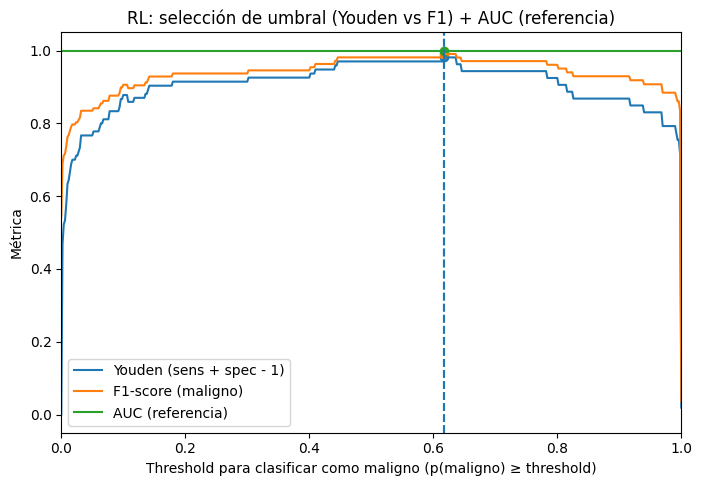

,métrica,threshold_óptimo,valor
0,Youden,0.618,0.981132
1,F1-score,0.618,0.990476
2,AUC (sin umbral),NaN,0.997694


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# --- Asegurar que existe y está entrenado rl_model ---
try:
    rl_model
except NameError:
    rl_model = Pipeline([
        ("scaler", StandardScaler()),
        ("rl", LogisticRegression(max_iter=5000, solver="lbfgs"))
    ])
    rl_model.fit(X_train, y_train)

# --- Probabilidades de maligno (clase 0) ---
idx0 = int(np.where(rl_model.classes_ == 0)[0][0])
p_malign = rl_model.predict_proba(X_test)[:, idx0]

y_true_malign = (y_test == 0).astype(int).to_numpy()  # 1=maligno, 0=benigno

# --- Barrido de umbrales ---
thresholds = np.linspace(0.0, 1.0, 501)

youden_vals = []
f1_vals = []

for thr in thresholds:
    pred_malign = (p_malign >= thr).astype(int)

    TP = np.sum((pred_malign == 1) & (y_true_malign == 1))
    TN = np.sum((pred_malign == 0) & (y_true_malign == 0))
    FP = np.sum((pred_malign == 1) & (y_true_malign == 0))
    FN = np.sum((pred_malign == 0) & (y_true_malign == 1))

    sens = TP / (TP + FN) if (TP + FN) > 0 else np.nan
    spec = TN / (TN + FP) if (TN + FP) > 0 else np.nan
    youden = sens + spec - 1

    f1 = (2 * TP) / (2 * TP + FP + FN) if (2 * TP + FP + FN) > 0 else np.nan

    youden_vals.append(youden)
    f1_vals.append(f1)

youden_vals = np.array(youden_vals, dtype=float)
f1_vals = np.array(f1_vals, dtype=float)

# --- AUC (no depende del umbral; se muestra como referencia) ---
auc_val = roc_auc_score(y_true_malign, p_malign)
auc_line = np.full_like(thresholds, fill_value=auc_val, dtype=float)

# --- Umbrales óptimos ---
thr_youden = thresholds[np.nanargmax(youden_vals)]
thr_f1 = thresholds[np.nanargmax(f1_vals)]

# --- Figura: 3 líneas (Youden, F1, AUC) y marcadores de óptimo ---
fig, ax = plt.subplots(figsize=(8.0, 5.2))

ax.plot(thresholds, youden_vals, label="Youden (sens + spec - 1)")
ax.plot(thresholds, f1_vals, label="F1-score (maligno)")
ax.plot(thresholds, auc_line, label="AUC (referencia)")

ax.axvline(thr_youden, linestyle="--", linewidth=1.5)
ax.axvline(thr_f1, linestyle="--", linewidth=1.5)

ax.scatter([thr_youden], [np.nanmax(youden_vals)], marker="o")
ax.scatter([thr_f1], [np.nanmax(f1_vals)], marker="o")
ax.scatter([thr_youden], [auc_val], marker="o")

ax.set_title("RL: selección de umbral (Youden vs F1) + AUC (referencia)")
ax.set_xlabel("Threshold para clasificar como maligno (p(maligno) ≥ threshold)")
ax.set_ylabel("Métrica")
ax.set_xlim(0, 1)
ax.set_ylim(-0.05, 1.05)
ax.legend()

plt.show()

# Resumen numérico
pd.DataFrame({
    "métrica": ["Youden", "F1-score", "AUC (sin umbral)"],
    "threshold_óptimo": [thr_youden, thr_f1, np.nan],
    "valor": [np.nanmax(youden_vals), np.nanmax(f1_vals), auc_val]
})


## Cómo interpretar la gráfica de selección de umbral (RL) - ACTIVIDAD VOLUNTARIA

En la figura hemos evaluado distintos **thresholds** (umbrales) para convertir la probabilidad estimada por la regresión logística `p(maligno)` en una decisión final:

- Si `p(maligno) ≥ threshold` → clasificamos como **maligno**.
- Si `p(maligno) < threshold` → clasificamos como **benigno**.

La gráfica muestra **tres líneas**:

1. **Youden (sensibilidad + especificidad − 1)**  
   Mide el compromiso entre **sensibilidad** (detectar malignos) y **especificidad** (no “falsos malignos” en benignos).  
   - El **máximo** de Youden sugiere el umbral que mejor equilibra sensibilidad y especificidad.

2. **F1-score (para maligno)**  
   Resume el equilibrio entre **precisión** (qué proporción de los predichos como malignos son realmente malignos) y **sensibilidad** (cuántos malignos detectas).  
   - El **máximo** de F1 favorece umbrales que reduzcan simultáneamente falsos positivos y falsos negativos, pero su “preferencia” depende de la prevalencia y del coste relativo de errores.

3. **AUC (referencia)**  
   El **AUC-ROC no depende del umbral**: evalúa la capacidad del modelo para **ordenar** casos malignos por encima de benignos.  
   - Por eso aparece como una **línea horizontal**: nos dice “qué tan bien separa el modelo” en general, pero **no** cuál es el mejor umbral operativo.

En la gráfica se marcan con líneas verticales los **umbrales óptimos** según Youden y según F1. Es normal que **no coincidan**: cada criterio optimiza una idea distinta de “mejor”.

---

## Tu tarea ahora
1. **Describe qué ocurre** al mover el umbral:
   - Si el umbral baja, ¿qué pasa con la sensibilidad y los falsos positivos?
   - Si el umbral sube, ¿qué pasa con la especificidad y los falsos negativos?

2. **Elige un umbral recomendado** y justifica tu elección:
   - ¿Te quedas con el umbral de **Youden**, con el de **F1**, o con otro?
   - ¿Por qué sería razonable en un contexto clínico?

---

## Propón nuevos métodos para decidir el umbral “óptimo”
Además de Youden y F1, puedes plantear (y justificar) criterios alternativos, por ejemplo:

- **Minimizar un coste clínico**: asignar pesos distintos a FN vs FP (p. ej., FN mucho más caro que FP).
- **Fijar una restricción clínica**: “sensibilidad ≥ 0.95” y, dentro de eso, maximizar especificidad.
- **Optimizar métricas adicionales**:
  - **Balanced accuracy**
  - **MCC (Matthews correlation coefficient)**
  - **Fβ-score** (dar más peso a sensibilidad si β>1)
- **Curvas PR (Precision–Recall)** y selección de umbral basada en el trade-off cuando la clase positiva es crítica.
- **Calibración de probabilidades** (y luego umbrales basados en riesgo absoluto): si el modelo está bien calibrado, puedes fijar umbrales según riesgo clínico aceptable.
- **Validación cruzada**: estimar el umbral óptimo de forma estable (no solo en un único split train/test).

La idea es que no existe un “mejor umbral universal”: debes elegirlo según **objetivo clínico, balance de errores y justificación cuantitativa**.


Variable más influyente según RF: worst perimeter (importancia = 0.1399)


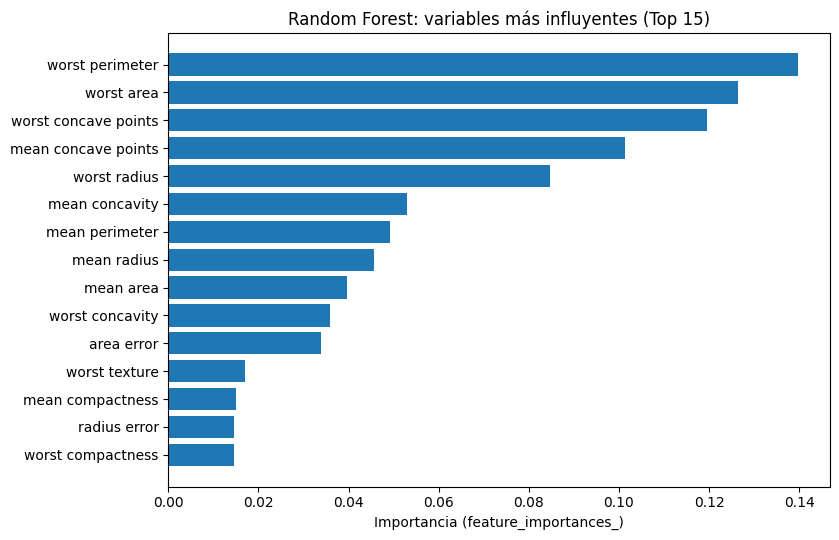

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Asegurar que existe rf_model entrenado ---
try:
    rf_model
    _ = rf_model.feature_importances_
except Exception:
    rf_model = RandomForestClassifier(
        n_estimators=500, random_state=42, class_weight="balanced"
    )
    rf_model.fit(X_train, y_train)

# --- Importancias ---
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Variable más influyente
top_var = importances.index[0]
top_val = importances.iloc[0]
print(f"Variable más influyente según RF: {top_var} (importancia = {top_val:.4f})")

# --- Gráfica (Top 15) ---
top_n = 15
imp_top = importances.head(top_n).sort_values(ascending=True)  # para que el mayor quede arriba en barh

fig, ax = plt.subplots(figsize=(8.5, 5.5))
ax.barh(imp_top.index, imp_top.values)
ax.set_title(f"Random Forest: variables más influyentes (Top {top_n})")
ax.set_xlabel("Importancia (feature_importances_)")
plt.tight_layout()
plt.show()


## Nueva tarea: regresión para predecir **worst perimeter**

A partir de aquí cambiamos de objetivo: en lugar de clasificar *maligno vs benigno*, vamos a **predecir un valor continuo** del dataset. En concreto, usaremos como variable respuesta:

- **`worst perimeter`** (Y)

y como variables predictoras:

- **todas las demás variables numéricas** del dataset (X), excluyendo `worst perimeter`.

Para resolver esta tarea de **regresión**, utilizaremos dos enfoques:

1. **Regresión lineal múltiple**: modelo lineal que estima cómo contribuye cada variable (manteniendo las demás constantes) a explicar `worst perimeter`.
2. **Random Forest de regresión**: modelo no lineal basado en un conjunto de árboles que puede capturar relaciones complejas e interacciones entre variables.

El objetivo es comparar ambos modelos y evaluar su rendimiento con métricas propias de regresión (por ejemplo, MAE/RMSE y R²), interpretando qué enfoque resulta más adecuado para predecir `worst perimeter`.


In [7]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# --- Definir target de regresión y matriz de predictores (todas menos worst perimeter) ---
target_reg = "worst perimeter"
X_reg_all = X.drop(columns=[target_reg]).copy()
y_reg = X[target_reg].copy()

# (Opcional) Calcula VIF en TRAIN para evitar "mirar" el test.
# Si aún no has hecho split para regresión, hazlo aquí (puedes ajustar test_size).
from sklearn.model_selection import train_test_split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg_all, y_reg, test_size=0.25, random_state=42
)

def compute_vif(df: pd.DataFrame) -> pd.Series:
    """Devuelve VIF por variable (sin incluir constante)."""
    scaler = StandardScaler()
    Xs = scaler.fit_transform(df.values)
    Xs = sm.add_constant(Xs)  # añade intercepto
    vifs = []
    for i in range(1, Xs.shape[1]):  # saltamos la constante (col 0)
        vifs.append(variance_inflation_factor(Xs, i))
    return pd.Series(vifs, index=df.columns, name="VIF").sort_values(ascending=False)

# --- Selección iterativa por VIF ---
vif_threshold = 10.0  # cambia a 5.0 si quieres un criterio más estricto

selected = Xr_train.columns.tolist()
removed = []

while True:
    vif = compute_vif(Xr_train[selected])
    max_vif = float(vif.iloc[0])
    if max_vif <= vif_threshold or len(selected) <= 2:
        break
    drop_var = vif.index[0]
    removed.append((drop_var, max_vif))
    selected.remove(drop_var)

# Resultados
print(f"Umbral VIF: {vif_threshold}")
print(f"Variables seleccionadas: {len(selected)} / {X_reg_all.shape[1]}")
print("\nVariables eliminadas (orden de eliminación):")
for v, val in removed:
    print(f" - {v}: VIF={val:.2f}")

vif_final = compute_vif(Xr_train[selected])
display(vif_final.to_frame())

# Matrices finales (listas para la regresión)
Xr_train_vif = Xr_train[selected].copy()
Xr_test_vif  = Xr_test[selected].copy()


Umbral VIF: 10.0
Variables seleccionadas: 16 / 29

Variables eliminadas (orden de eliminación):
 - mean radius: VIF=3738.75
 - mean perimeter: VIF=495.40
 - worst radius: VIF=125.69
 - mean concavity: VIF=65.77
 - radius error: VIF=39.19
 - worst concave points: VIF=33.56
 - worst compactness: VIF=29.66
 - mean area: VIF=25.99
 - mean compactness: VIF=19.83
 - area error: VIF=16.92
 - worst texture: VIF=16.81
 - worst fractal dimension: VIF=14.38
 - mean concave points: VIF=11.54


,VIF
worst smoothness,8.552035
worst concavity,7.914892
concavity error,7.172848
worst symmetry,6.591713
fractal dimension error,6.587433
compactness error,5.823702
mean smoothness,5.556655
mean fractal dimension,5.323742
worst area,5.231856
concave points error,3.976957


## Selección de variables con VIF (Variance Inflation Factor)

Antes de ajustar modelos de **regresión** para predecir `worst perimeter`, hemos aplicado un criterio de selección de variables basado en **VIF** (Factor de Inflación de la Varianza). El VIF es una medida de **multicolinealidad**: cuantifica hasta qué punto una variable predictora puede ser explicada linealmente por las demás.

### ¿Por qué es importante?
En regresión lineal múltiple, si dos o más predictores están muy correlacionados:
- los coeficientes pueden volverse **inestables** (cambian mucho ante pequeñas variaciones de datos),
- aumenta la varianza de las estimaciones,
- se dificulta la interpretación (“¿qué variable es realmente relevante?”).

### Definición (idea)
Para cada predictor $X_j$, se ajusta una regresión auxiliar de $X_j$ contra el resto de predictores y se obtiene $R_j^2$.  
Entonces:

$$
\text{VIF}_j = \frac{1}{1 - R_j^2}
$$

- Si $R_j^2$ es alto, $X_j$ se explica bien por los demás → **VIF grande** → alta colinealidad.
- Si $R_j^2$ es bajo → **VIF cercano a 1** → poca colinealidad.

### Regla práctica (umbral)
En la práctica se usan umbrales orientativos:
- **VIF ≈ 1–2**: sin problema relevante.
- **VIF > 5**: colinealidad moderada (vigilar).
- **VIF > 10**: colinealidad alta (criterio habitual para eliminar).

### Procedimiento que hemos aplicado
Hemos usado un enfoque **iterativo**:

1. Calculamos el VIF de todas las variables (en el conjunto de entrenamiento).
2. Identificamos la variable con **VIF máximo**.
3. Si ese VIF supera el umbral (por ejemplo, 10), eliminamos esa variable.
4. Recalculamos VIF y repetimos hasta que todas queden por debajo del umbral (o queden muy pocas variables).

El resultado es un subconjunto de predictores con menor multicolinealidad, más adecuado para:
- interpretar coeficientes en regresión lineal múltiple,
- y, en general, reducir redundancia entre variables.


In [8]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# --- Asumimos que ya existen:
# Xr_train_vif, Xr_test_vif, yr_train, yr_test (de la celda VIF)

# Modelo 1: Regresión lineal múltiple (conviene estandarizar)
linreg = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

# Modelo 2: Random Forest Regressor (no necesita estandarización)
rf_reg = RandomForestRegressor(
    n_estimators=600,
    random_state=42
)

# Entrenar
linreg.fit(Xr_train_vif, yr_train)
rf_reg.fit(Xr_train_vif, yr_train)

# Predecir
pred_lr = linreg.predict(Xr_test_vif)
pred_rf = rf_reg.predict(Xr_test_vif)

# RMSE
rmse_lr = np.sqrt(mean_squared_error(yr_test, pred_lr))
rmse_rf = np.sqrt(mean_squared_error(yr_test, pred_rf))

# Comparación
results_reg = pd.DataFrame({
    "modelo": ["Regresión lineal múltiple", "Random Forest Regressor"],
    "RMSE": [rmse_lr, rmse_rf]
}).sort_values("RMSE")

results_reg


,modelo,RMSE
1,Random Forest Regressor,4.342853
0,Regresión lineal múltiple,5.482398


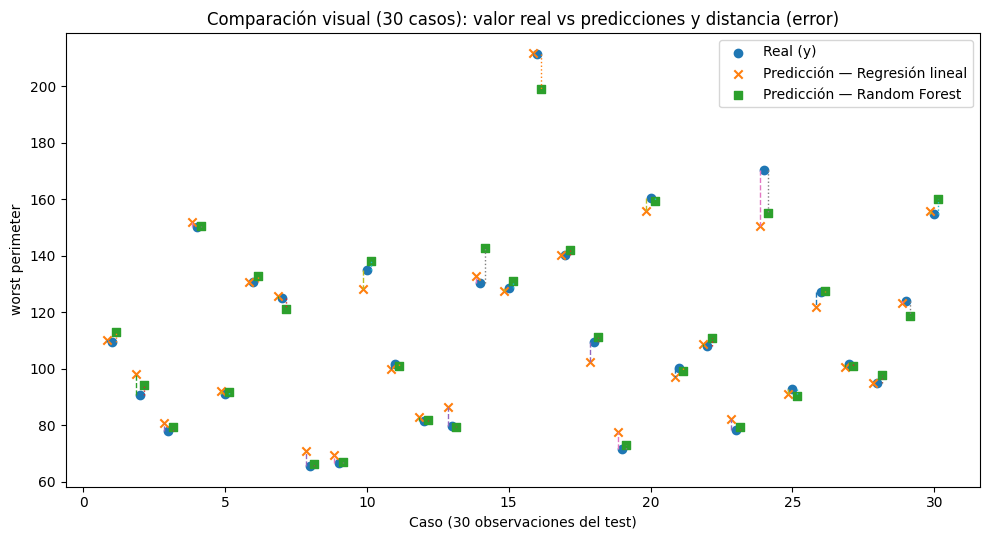

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Tomamos 30 casos del conjunto test (fijamos semilla para reproducibilidad)
rng = np.random.default_rng(42)
sample_idx = rng.choice(Xr_test_vif.index.to_numpy(), size=30, replace=False)

# Valores reales y predicciones (solo para esos 30)
y_true_30 = yr_test.loc[sample_idx].to_numpy()
y_lr_30 = linreg.predict(Xr_test_vif.loc[sample_idx])
y_rf_30 = rf_reg.predict(Xr_test_vif.loc[sample_idx])

# Eje X: 30 puntos (1..30) para visualizar
x = np.arange(1, 31)
x_lr = x - 0.15
x_rf = x + 0.15

fig, ax = plt.subplots(figsize=(10, 5.5))

# Punto real
ax.scatter(x, y_true_30, label="Real (y)", marker="o")

# Predicciones de cada modelo
ax.scatter(x_lr, y_lr_30, label="Predicción — Regresión lineal", marker="x")
ax.scatter(x_rf, y_rf_30, label="Predicción — Random Forest", marker="s")

# “Distancia” (error) como segmento vertical desde el valor real al predicho
for i in range(30):
    ax.plot([x_lr[i], x_lr[i]], [y_true_30[i], y_lr_30[i]], linestyle="--", linewidth=1)
    ax.plot([x_rf[i], x_rf[i]], [y_true_30[i], y_rf_30[i]], linestyle=":", linewidth=1)

ax.set_title("Comparación visual (30 casos): valor real vs predicciones y distancia (error)")
ax.set_xlabel("Caso (30 observaciones del test)")
ax.set_ylabel("worst perimeter")
ax.legend()
plt.tight_layout()
plt.show()


## Qué se ha hecho en las dos celdas anteriores (modelos + comparación por RMSE)

1. **Definimos el objetivo de regresión**: predecir el valor continuo `worst perimeter` usando como predictores el subconjunto de variables seleccionado previamente con el criterio **VIF** (para reducir multicolinealidad).

2. **Entrenamos dos modelos de regresión** con los mismos datos:
   - **Regresión lineal múltiple** (con estandarización previa de variables).
   - **Random Forest Regressor** (modelo no lineal basado en árboles, sin necesidad de normalizar).

3. **Evaluamos ambos modelos en el conjunto de test** y comparamos su rendimiento usando **RMSE** (Root Mean Squared Error), que resume el error típico de predicción penalizando especialmente los errores grandes. El modelo con **RMSE menor** tiene mejor ajuste predictivo, en promedio, sobre el test.

---

## Qué se ha hecho en la celda del gráfico 2D (comparación visual de 30 casos)

1. Seleccionamos **30 observaciones del conjunto test** (muestra aleatoria reproducible).
2. Para cada una de esas 30 observaciones:
   - representamos el **valor real** de `worst perimeter`,
   - representamos la **predicción** del modelo de regresión lineal,
   - representamos la **predicción** del Random Forest.
3. Dibujamos, para cada modelo, un **segmento vertical** entre el valor real y el valor predicho: esa “distancia” es el **error** (residuo) para ese caso.
   - Segmento más corto → mejor predicción para ese caso.
   - Si un modelo tiende a tener segmentos más cortos en conjunto, su rendimiento suele ser mejor (coherente con un RMSE menor).

---

## Tu tarea ahora (interpretación personal, con apoyo opcional de IA)

Ahora te toca a ti **interpretar** lo que observas:

- ¿Qué modelo parece predecir mejor en general?
- ¿En qué tipo de casos falla más cada modelo (errores grandes)?
- ¿Ves patrones de sesgo (por ejemplo, sobreestimar valores altos o infraestimar valores bajos)?
- ¿Coincide tu impresión visual con la comparación por RMSE?

Puedes usar **IA** para proponer nuevo código, nuevas métricas o visualizaciones (p. ej., gráfico real vs predicho, distribución de residuos, análisis por cuantiles, validación cruzada, etc.).  
Pero la **interpretación y la justificación final** deben ser **absolutamente personales**: explica con tus palabras qué concluyes y por qué.


## Reto voluntario: ¿puedes mejorar el modelo?

De forma **totalmente voluntaria**, se propone un reto adicional para quienes quieran profundizar: **construir un modelo de regresión que mejore el RMSE** obtenido hasta ahora al predecir `worst perimeter`.

Resultados actuales (referencia):
- **Random Forest Regressor**: RMSE = **4.342853**
- **Regresión lineal múltiple**: RMSE = **5.482398**

### En qué consiste el reto
Tu objetivo es diseñar y justificar un enfoque que consiga un **RMSE menor que 4.342853** en el conjunto de test (o, idealmente, en un esquema más robusto como validación cruzada).

### Orientaciones (puedes elegir tu camino)
Puedes explorar, por ejemplo:
- ajuste de **hiperparámetros** del Random Forest,
- nuevos modelos (p. ej., Gradient Boosting / XGBoost / LightGBM / Elastic Net, etc.),
- nuevas estrategias de validación (p. ej., **cross-validation**),
- ingeniería de variables, transformaciones o selección alternativa,
- análisis de residuos y detección de outliers.

### Importante
Este reto requiere **trabajo con profundidad** (pruebas, comparación rigurosa, justificación y explicación).  
No es obligatorio y **no penaliza** no realizarlo, pero se **anima** a intentarlo porque suele ser la parte donde más se aprende.

Puedes usar **IA** para ayudarte a generar código y propuestas de análisis, pero recuerda: el diseño del experimento, la comparación y la interpretación deben ser tuyas.
